<a href="https://colab.research.google.com/github/WHataCoolDay/T1/blob/main/6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 넘파이로 구현한 간단한 RNN

import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, input_features))
b = np.random.random((output_features, ))

successive_outputs = []
for input_t in inputs:
  output_t = np.tanh(np.dot(W,input_t)+ np.dot(U, state_t)+ b)
  successive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis = 0)

ValueError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 6-22 IMDB 데이터 전처리하기
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('데이터 로딩...')
(input_train, y_train),(input_test, y_test) = imdb.load_data( num_words = max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (sample x time)')
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)
print('input_train 크기: ', input_train.shape)
print('input_test 크기: ', input_test.shape)

데이터 로딩...
17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (sample x time)
input_train 크기:  (25000, 500)
input_test 크기:  (25000, 500)


In [ ]:
# 6-23 Embedding 층과 SimpleRNN 층을 사용한 모델 훈련하기
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics = ['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 46s 157ms/step - loss: 0.6529 - acc: 0.5959 - val_loss: 0.4068 - val_acc: 0.8264
Epoch 2/10
157/157 [==============================] - 24s 152ms/step - loss: 0.3634 - acc: 0.8516 - val_loss: 0.7618 - val_acc: 0.6994
Epoch 3/10
157/157 [==============================] - 24s 154ms/step - loss: 0.2711 - acc: 0.8977 - val_loss: 0.4751 - val_acc: 0.8058
Epoch 4/10
157/157 [==============================] - 24s 153ms/step - loss: 0.2095 - acc: 0.9229 - val_loss: 0.3395 - val_acc: 0.8688
Epoch 5/10
157/157 [==============================] - 24s 153ms/step - loss: 0.1535 - acc: 0.9434 - val_loss: 0.3865 - val_acc: 0.8462
Epoch 6/10
157/157 [==============================] - 24s 154ms/step - loss: 0.0958 - acc: 0.9698 - val_loss: 0.3965 - val_acc: 0.8630
Epoch 7/10
157/157 [==============================] - 24s 153ms/step - loss: 0.0615 - acc: 0.9807 - val_loss: 0.4651 - val_acc: 0.8380
Epoch 8/10
157/157 [==============================] - 2

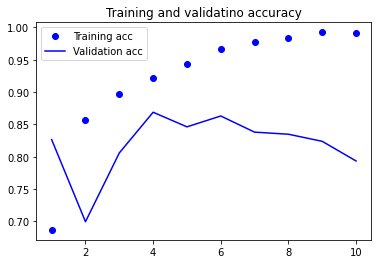

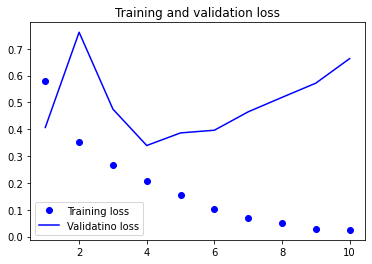

In [ ]:
# 6-24 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'bo',label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validatino accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validatino loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1, activation ='sigmoid'))

model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics = ['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 56s 334ms/step - loss: 0.5915 - acc: 0.6659 - val_loss: 0.3533 - val_acc: 0.8542
Epoch 2/10
157/157 [==============================] - 52s 333ms/step - loss: 0.2997 - acc: 0.8826 - val_loss: 0.3302 - val_acc: 0.8600
Epoch 3/10
157/157 [==============================] - 54s 342ms/step - loss: 0.2274 - acc: 0.9138 - val_loss: 0.3031 - val_acc: 0.8754
Epoch 4/10
157/157 [==============================] - 53s 339ms/step - loss: 0.1905 - acc: 0.9322 - val_loss: 0.3155 - val_acc: 0.8666
Epoch 5/10
157/157 [==============================] - 52s 334ms/step - loss: 0.1629 - acc: 0.9420 - val_loss: 0.2899 - val_acc: 0.8856
Epoch 6/10
157/157 [==============================] - 53s 337ms/step - loss: 0.1570 - acc: 0.9443 - val_loss: 0.3000 - val_acc: 0.8786
Epoch 7/10
157/157 [==============================] - 52s 332ms/step - loss: 0.1382 - acc: 0.9495 - val_loss: 0.4001 - val_acc: 0.8740
Epoch 8/10
157/157 [==============================] - 5

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'bo',label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validatino accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validatino loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()